# ePPR - extended Projection Pursuit Regression
# $$\hat{y}_i=\bar{y}+\sum_{d=0}^D\sum_{m=1}^{M_d}\beta_{m,d}\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})$$
# with    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})=0$,    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}^2(\alpha_{m,d}^Tx_{i-d})=1$
# by minimizing    $f=\sum_{i=1}^n(y_i-\hat{y}(x_i))^2+\lambda\sum_{d=0}^D\sum_{m=1}^{M_d}\Vert{L\alpha_{m,d}}\Vert^2$
___
### References
Rapela, J., Felsen, G., Touryan, J., Mendel, J.M., and Grzywacz, N.M. (2010). ePPR: a new strategy for the characterization of sensory cells from input/output data. Network: Computation in Neural Systems 21, 35–90.

Friedman, J.H., and Stuetzle, W. (1981). Projection Pursuit Regression. Journal of the American Statistical Association 76, 817–823.
___

## Simulated Data
#### X: Natural Images
#### Y: Simulated Neuron with MFR=0.56, MIF=4.26

In [ ]:
using Revise,FileIO
simdata=load("./simdata.jld");x=simdata["x"];y=simdata["y"];imagesize=(16,16);

In [ ]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),observe(i))
yvalue = map(j->y[j],observe(i))
display.([i,xvalue,yvalue]);

## ePPR with Linear Time Interaction

In [ ]:
using ePPR
hp=ePPRHyperParams(imagesize...)
hp.lambda = 15
hp.nft = [4,4,4]
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y,hp,debug);

### Final Model

In [ ]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

In [ ]:
hp=ePPRHyperParams(imagesize...,ndelay=3)
hp.lambda = 15
hp.nft = [6]
model,models = epprcv(x,y,hp,debug);

### Final Model

In [ ]:
plotmodel(model,hp)

## Data Recorded from an Anesthetized Cat
#### X: Natural Images each present 40ms
#### Y1: Neuron Spike Sum
#### Y2: Neuron Spike Sum

In [1]:
using Revise,FileIO
data=load("./data.jld");x=data["x"];y1=data["y1"];y2=data["y2"];imagesize=(12,12);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6b3a5b6c8f72e1db63ba57a141aa78843507c519-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6b3a5b6c8f72e1db63ba57a141aa78843507c519-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 4 listeners. Value:
12000), Observable{Int64} with 4 listeners. Value:
12000, Scope("knockout-component-7e9509cb-f145-45a9-8b23-740f069912c6", Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>24000,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 4 listeners. Value:
12000, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\Alex\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":12000}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-7e9509cb-f145-45a9-8b23-740f069912c6\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-7e9509cb-f145-45a9-8b23-740f069912c6\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n    

Observable{Any} with 0 listeners. Value:
Gray{Float64}[Gray{Float64}(0.537255) Gray{Float64}(0.360784) … Gray{Float64}(0.298039) Gray{Float64}(0.329412); Gray{Float64}(0.360784) Gray{Float64}(0.329412) … Gray{Float64}(0.74902) Gray{Float64}(0.74902); … ; Gray{Float64}(0.270588) Gray{Float64}(0.329412) … Gray{Float64}(0.419608) Gray{Float64}(0.388235); Gray{Float64}(0.180392) Gray{Float64}(0.239216) … Gray{Float64}(0.388235) Gray{Float64}(0.388235)]
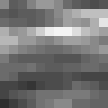
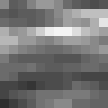

Observable{Any} with 0 listeners. Value:
0

Observable{Any} with 0 listeners. Value:
29

In [2]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),observe(i))
y1value = map(j->y1[j],observe(i))
y2value = map(j->y2[j],observe(i))
display.([i,xvalue,y1value,y2value]);

## ePPR with Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
ePPR Forward Stepwise ...
Fit [Temporal-0, Spatial-1] New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 441518.9195581976, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.132208865503979
                                 step is easy
New Term 2th iteration. TermLoss: 428443.2814673675, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.2600241116134723
                                 step is λ = 0
New Term 3th iteration. TermLoss: 427230.4283036183, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.3958624661466181
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00060514198084023.
Fit [Temporal-0, Spatial-2] New Term ...
Get Initial α ...
New Term

New Term 2th iteration. TermLoss: 292944.9884269698, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8687260321192635
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.001429887407632415.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.18709, 1.92714, 0.701274, 0.275146, 1.97419, 1.36765, 1.2592, 0.249072, 1.63028, 0.395961, 0.434446, 0.30663]
New βs: [3.15554, 2.0277, 0.778493, 0.318304, 1.91495, 1.26213, 1.35795, 0.321882, 1.63474, 0.376988, 0.510125, 0.3391]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 292690.6334436187, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0784676202281371
                                 step is λ = 0
New Term 2th iteration. TermLoss: 291027.80841545266, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.07392326819

                                 step is easy
New Term converged in 7 iterations with (lossₒ-lossₙ)/lossₒ = 0.0009817512628880697.
Refit [Temporal-2, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 280106.37643597944, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9446535414986064
                                 step is λ = 0
New Term 2th iteration. TermLoss: 279942.89397871634, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9268640131588355
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 4.9910829466092696e-5.
Refit [Temporal-2, Spatial-2] New Term ...
New Term 1th iteration. TermLoss: 279441.8296395396, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9447554557034629
                                 step is easy
New Term 2th iteration. TermLoss: 278459.4463393036,

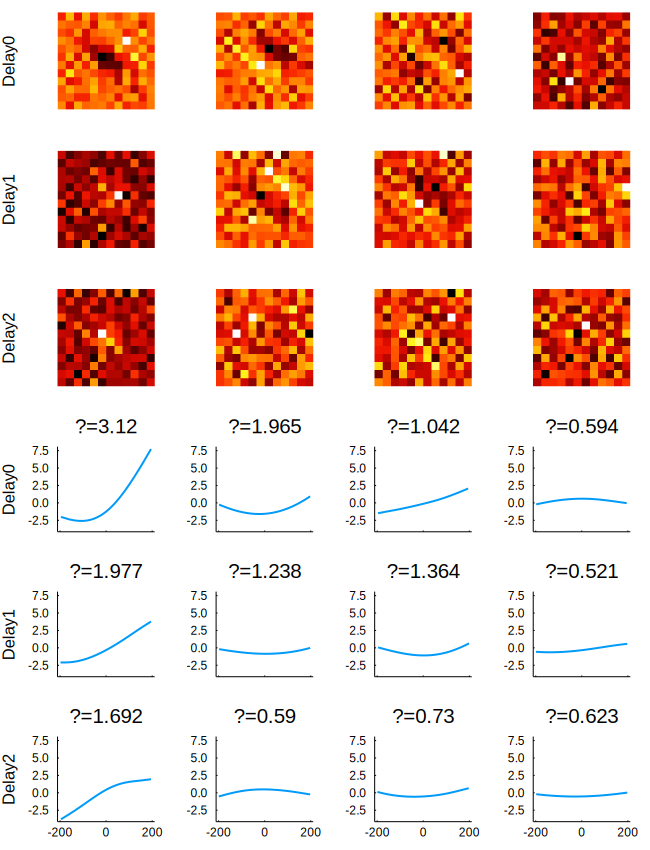

Drop Term: [temporal-1, spatial-4] with β: 0.5211061469420997.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.11989, 1.96512, 1.04242, 0.593744, 1.97739, 1.23808, 1.36355, 1.69175, 0.589714, 0.730029, 0.622887]
New βs: [3.20813, 2.08388, 1.0378, 0.656509, 1.99176, 1.33858, 1.42551, 1.69487, 0.676763, 0.749028, 0.653068]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 275464.4609992812, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0589070348743865
                                 step is λ = 0
New Term 2th iteration. TermLoss: 274486.3671386988, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0211855161373855
                                 step is λ = 0
New Term 3th iteration. TermLoss: 274469.02565722575, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9925305607449297
                                

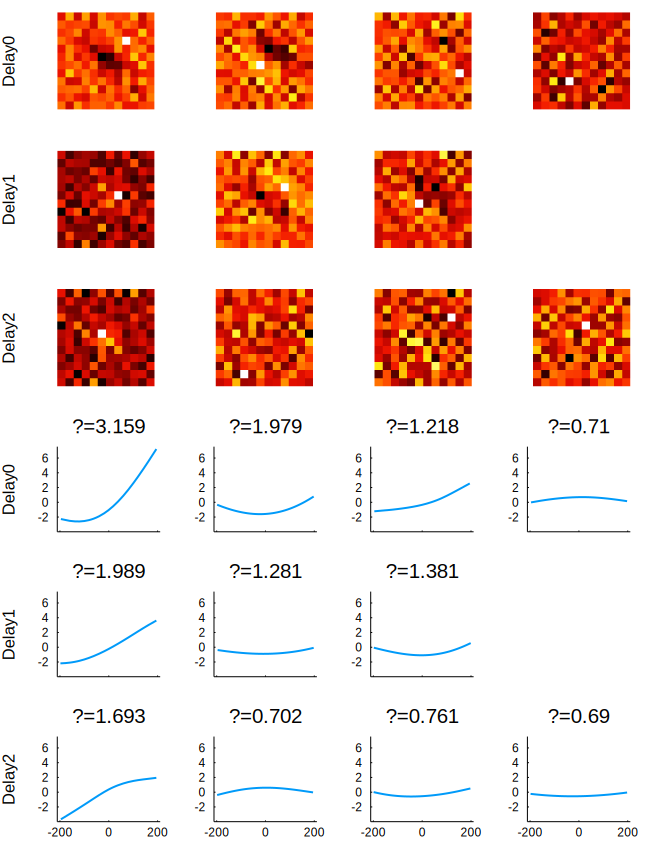

Drop Term: [temporal-2, spatial-4] with β: 0.6901259084339242.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.15862, 1.97865, 1.21758, 0.710212, 1.98884, 1.28059, 1.38137, 1.69284, 0.70159, 0.760534]
New βs: [3.257, 2.08441, 1.23455, 0.793611, 2.0204, 1.36914, 1.47547, 1.71252, 0.805691, 0.818804]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 274323.0953896652, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0334133233124871
                                 step is λ = 0
New Term 2th iteration. TermLoss: 273934.15570731706, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9927048820092199
                                 step is λ = 0
New Term 3th iteration. TermLoss: 273927.2465360376, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9888307905902419
                                 step is λ = 0
New Term

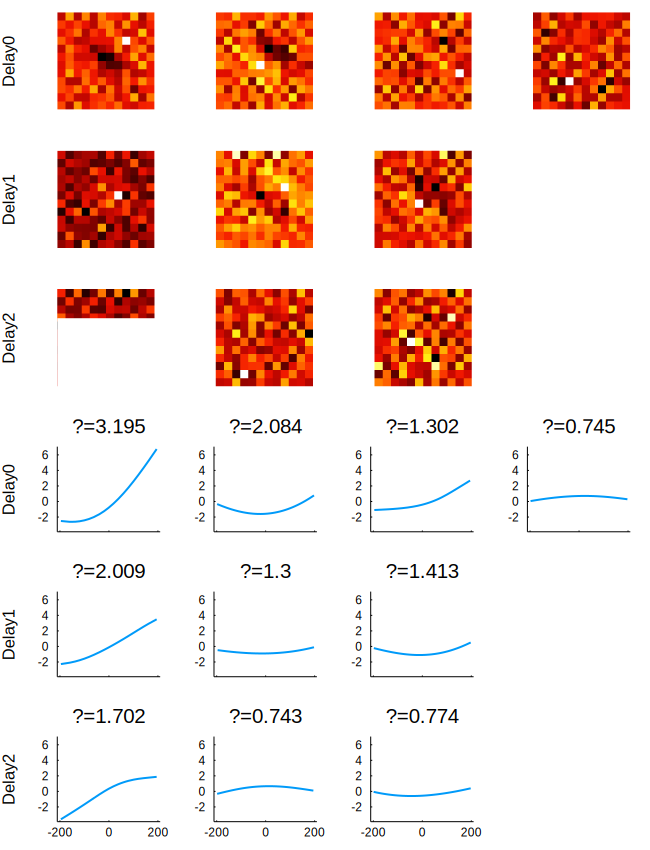

Drop Term: [temporal-2, spatial-2] with β: 0.7426087021616216.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.1949, 2.08441, 1.30151, 0.744856, 2.00856, 1.29977, 1.41321, 1.70189, 0.774468]
New βs: [3.28107, 2.09149, 1.32968, 0.820172, 2.03948, 1.38508, 1.49381, 1.68072, 0.793835]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 278362.0930249767, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0101933865198736
                                 step is λ = 0
New Term 2th iteration. TermLoss: 278217.90223671077, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9888137657714862
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0003726806535285792.
Refit [Temporal-0, Spatial-2] New Term ...
New Term 1th iteration. TermLoss: 278335.6276496221, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0


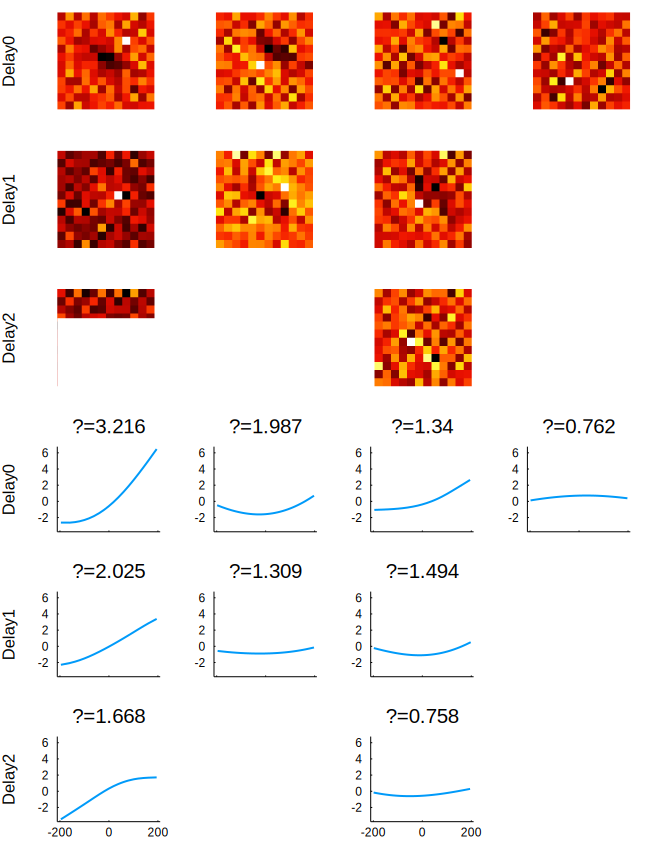

Drop Term: [temporal-2, spatial-3] with β: 0.7584497659255817.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.21558, 1.98706, 1.34008, 0.762249, 2.02533, 1.30917, 1.49381, 1.66753]
New βs: [3.30209, 2.09393, 1.36035, 0.837491, 2.03903, 1.39451, 1.5153, 1.70982]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 282942.8351949661, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0018568972228223
                                 step is λ = 0
New Term 2th iteration. TermLoss: 282857.7646180327, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9893093492238885
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0003570698155605443.
Refit [Temporal-0, Spatial-2] New Term ...
New Term 1th iteration. TermLoss: 282955.6974900215, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                     

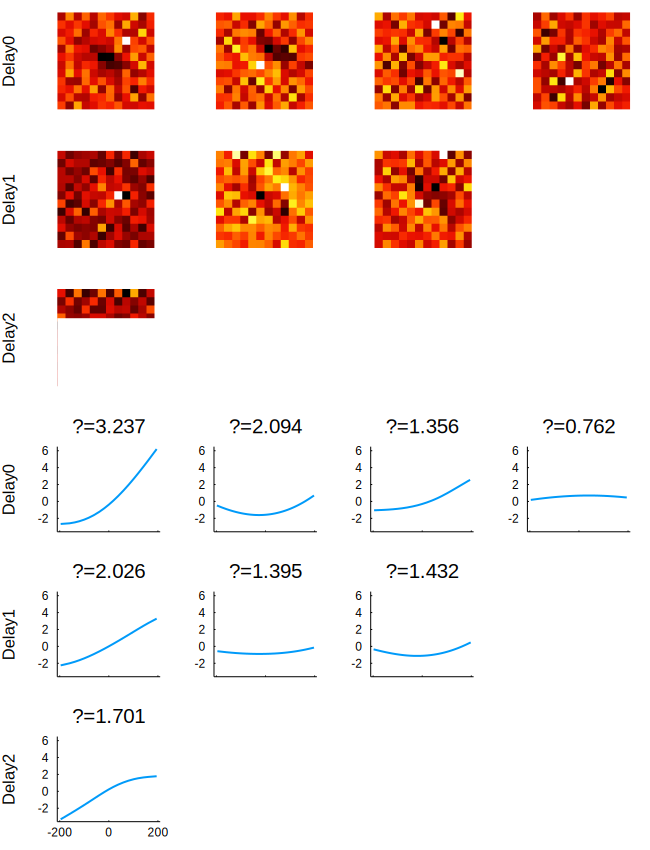

Drop Term: [temporal-0, spatial-4] with β: 0.7622830645926506.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.23694, 2.09393, 1.35554, 2.02596, 1.39451, 1.43207, 1.70144]
New βs: [3.31626, 2.12658, 1.29459, 2.04157, 1.41747, 1.51954, 1.72209]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 288239.0257182652, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.8959161047614258
                                 step is λ = 0
New Term 2th iteration. TermLoss: 287726.01997930824, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9378999784553853
                                 step is λ = 0
New Term 3th iteration. TermLoss: 287712.96990178555, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9944521416491542
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0

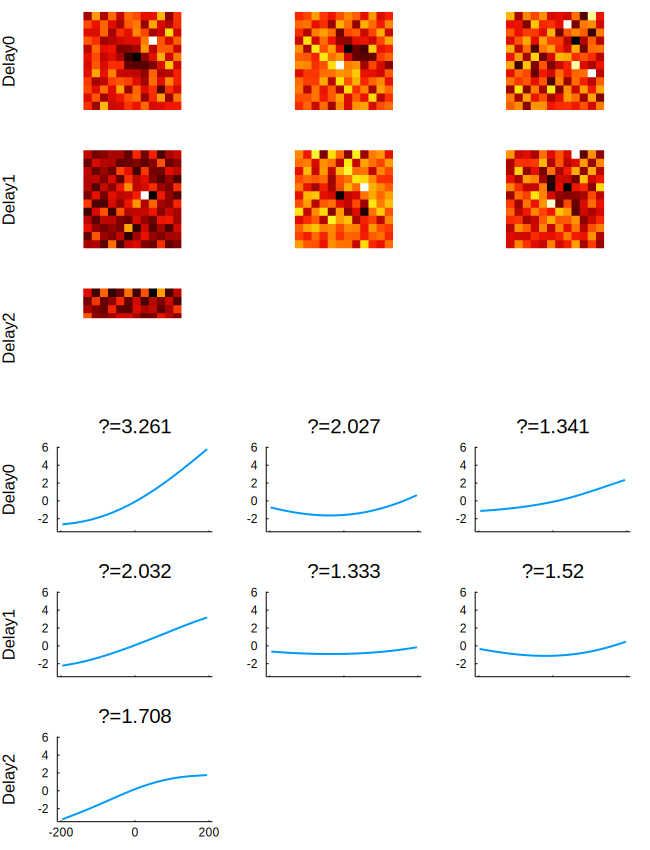

Drop Term: [temporal-1, spatial-2] with β: 1.3329490051178519.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.26094, 2.02662, 1.34062, 2.03167, 1.51954, 1.70833]
New βs: [3.37216, 2.14409, 1.3973, 2.03017, 1.58858, 1.72036]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 303763.63401121245, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0071961383156327
                                 step is λ = 0
New Term 2th iteration. TermLoss: 303500.5894565154, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9990466976202522
                                 step is λ = 0
New Term 3th iteration. TermLoss: 303496.4698645103, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9946938143727266
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0003176362837977335

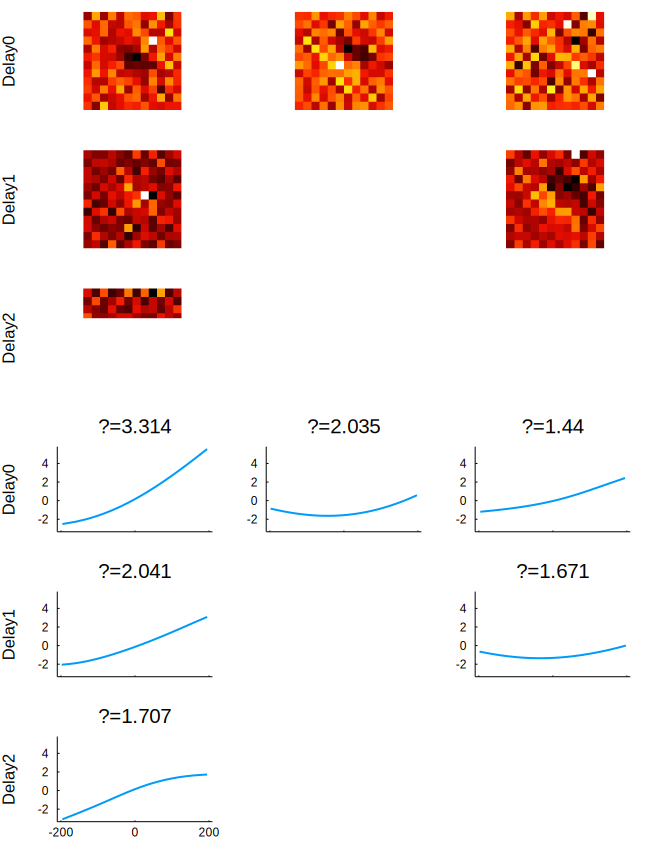

Drop Term: [temporal-0, spatial-3] with β: 1.440155393504384.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.31355, 2.03518, 2.0411, 1.67104, 1.70672]
New βs: [3.18912, 2.0666, 2.00866, 1.76228, 1.70839]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 312713.4583392943, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9625201971914935
                                 step is easy
New Term 2th iteration. TermLoss: 306327.6847402117, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9388061366724748
                                 step is λ = 0
New Term 3th iteration. TermLoss: 306133.27723642276, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.8897190569322361
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.000240850134733473.
Refit [Temporal-0, S

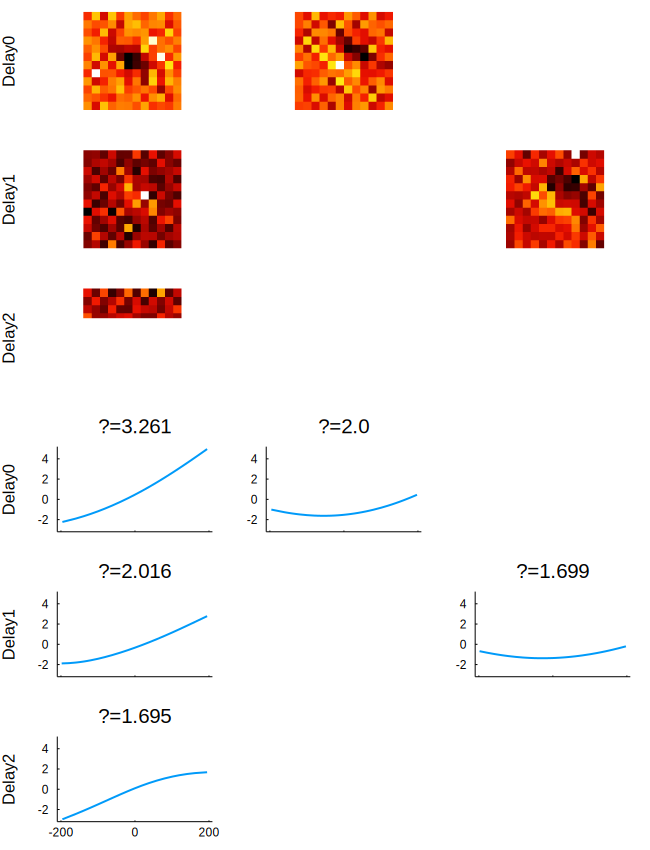

Drop Term: [temporal-2, spatial-1] with β: 1.6949320786846958.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.26055, 2.00018, 2.01613, 1.69865]
New βs: [3.29415, 2.1108, 2.07831, 1.78162]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 328389.1610779185, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9919174282602325
                                 step is λ = 0
New Term 2th iteration. TermLoss: 328148.1334107132, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9876601568456639
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00022702459181993246.
Refit [Temporal-0, Spatial-2] New Term ...
New Term 1th iteration. TermLoss: 328225.36586073897, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.002474431901152
                                 step 

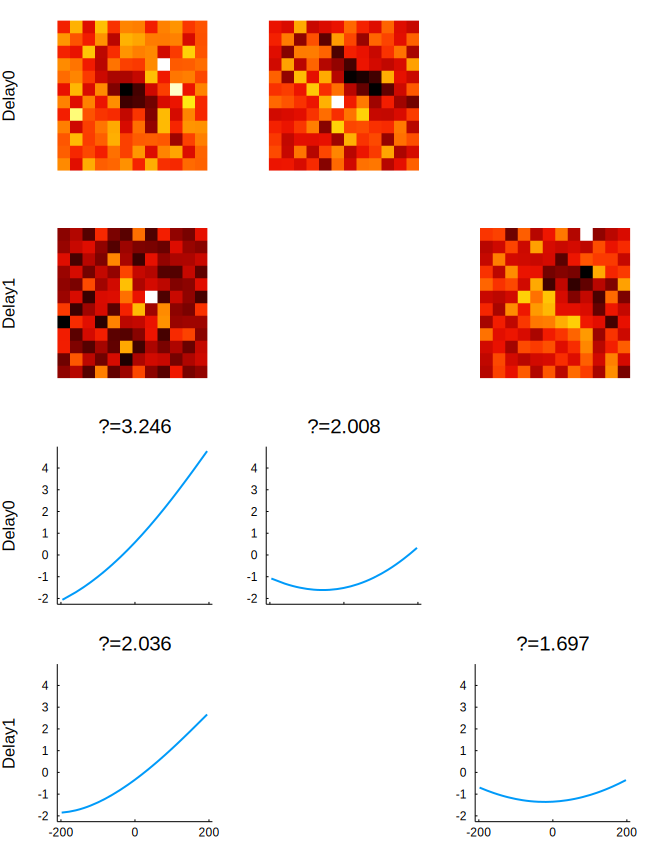

Drop Term: [temporal-1, spatial-3] with β: 1.6968807021261327.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.2455, 2.00813, 2.03627]
New βs: [3.29834, 2.12355, 2.10746]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 354549.4387629675, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.982038097250111
                                 step is λ = 0
New Term 2th iteration. TermLoss: 354315.59054729244, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9950284719470851
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00021217066179797693.
Refit [Temporal-0, Spatial-2] New Term ...
New Term 1th iteration. TermLoss: 354414.4158229186, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9569143904773851
                                 step is λ = 0
New Term 

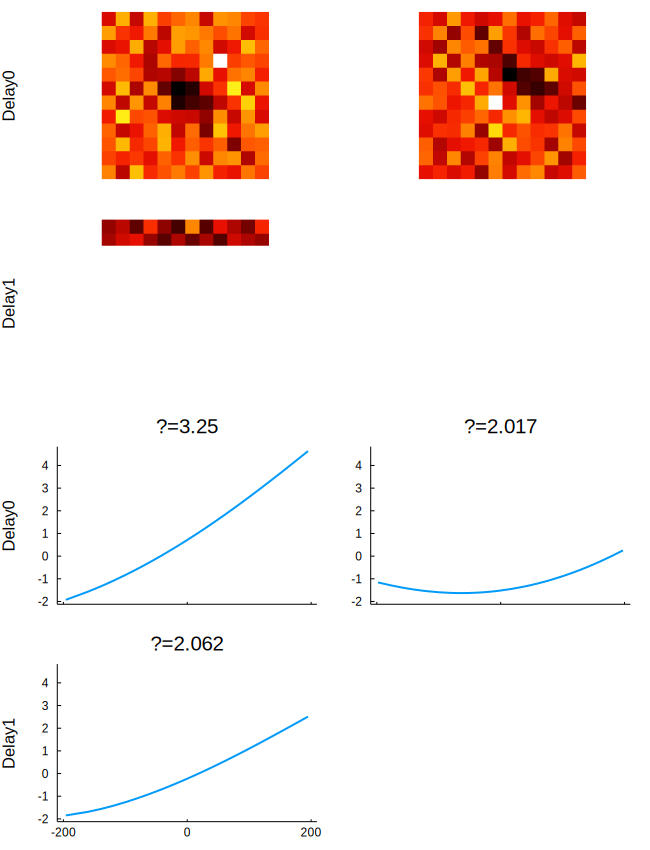

Drop Term: [temporal-0, spatial-2] with β: 2.0173441774358585.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.2496, 2.06184]
New βs: [3.20151, 2.1078]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 391708.94237982493, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.132278878733782
                                 step is λ = 0
New Term 2th iteration. TermLoss: 390100.69649454387, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.2793112111820648
                                 step is λ = 0
New Term 3th iteration. TermLoss: 389988.30857155257, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.1475101320869834
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00029068128806597064.
Refit [Temporal-1, Spatial-1] New Term ...
New Term 1th iteration. Te

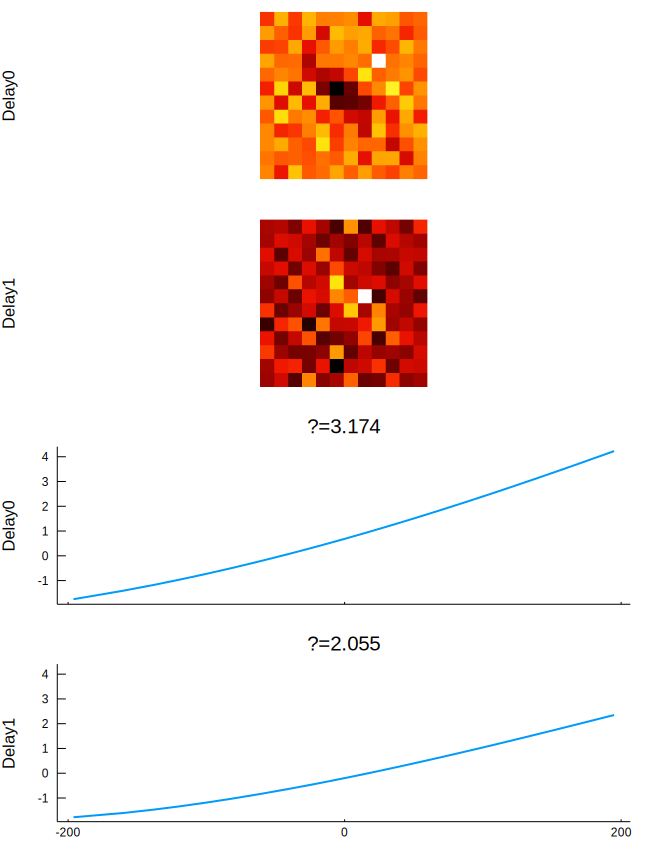

Drop Term: [temporal-1, spatial-1] with β: 2.054502511878713.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [3.17372]
New βs: [3.24704]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 427422.08916202164, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.0402511251379016
                                 step is λ = 0
New Term 2th iteration. TermLoss: 427003.31427166384, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.0556841283780638
                                 step is λ = 0
New Term 3th iteration. TermLoss: 426982.5559810489, PenaltyLoss: 0.0.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.0174765512000645
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0002230839330253223.


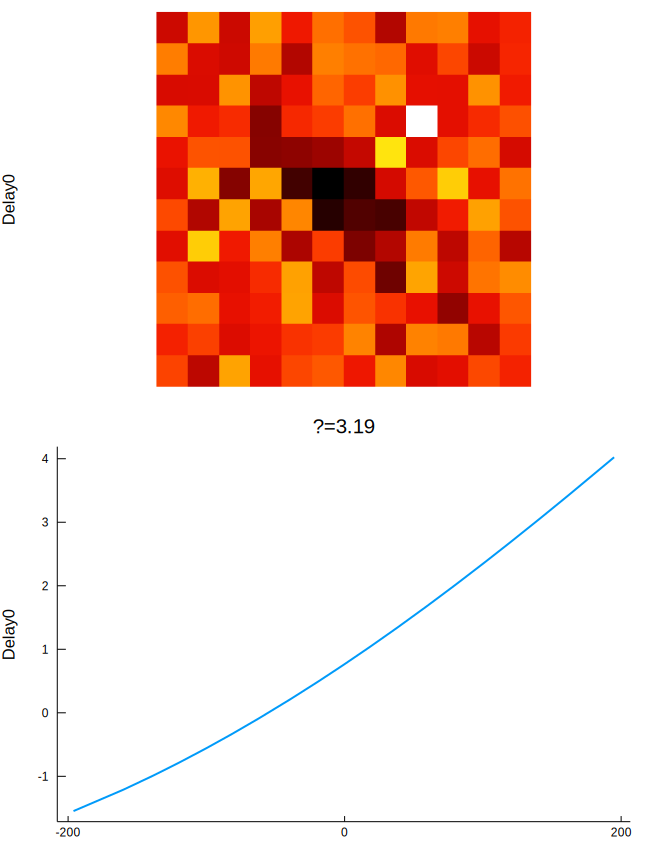

ePPR Models Cross Validation ...


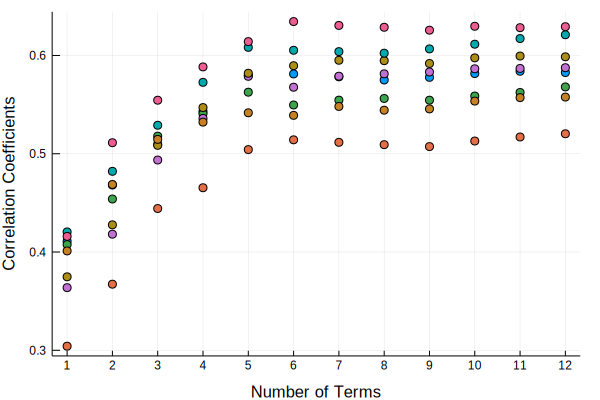

11th model with 11 terms is chosen.
Model drop spurious term: Array{Int64,1}[[0, 3], [0, 4], [1, 2], [2, 3]].
ePPR Model Forward Stepwise ...
Fit Model [Temporal-0, Spatial-1] New Term ...
Fit Model [Temporal-0, Spatial-2] New Term ...
Fit Model [Temporal-1, Spatial-1] New Term ...
Fit Model [Temporal-1, Spatial-2] New Term ...
Fit Model [Temporal-2, Spatial-1] New Term ...
Fit Model [Temporal-2, Spatial-2] New Term ...
Fit Model [Temporal-2, Spatial-3] New Term ...
Refit Model βs ...
Old βs: [3.12638, 1.92687, 2.00685, 1.43248, 1.68066, 0.675509, 0.714262]
New βs: [3.2382, 2.05755, 1.96977, 1.54142, 1.70816, 0.793225, 0.769423]
Cross Validated ePPR Done.


In [12]:
using ePPR
hp=ePPRHyperParams(imagesize...)
hp.lambda =0
hp.nft = [4,4,4]
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y2,hp,debug);

ePPR Models Cross Validation ...


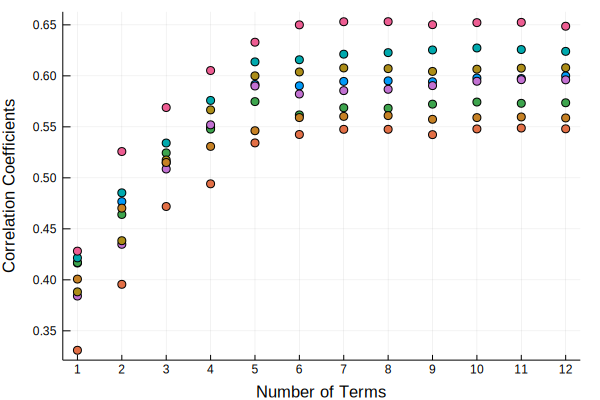

7th model with 7 terms is chosen.
Model drop spurious term: Array{Int64,1}[[0, 3]].
ePPR Model Forward Stepwise ...
Fit Model [Temporal-0, Spatial-1] New Term ...
Fit Model [Temporal-0, Spatial-2] New Term ...
Fit Model [Temporal-1, Spatial-1] New Term ...
Fit Model [Temporal-1, Spatial-2] New Term ...
Fit Model [Temporal-1, Spatial-3] New Term ...
Fit Model [Temporal-2, Spatial-1] New Term ...
Refit Model βs ...
Old βs: [3.08254, 1.88823, 1.9865, 0.821354, 1.57998, 1.64831]
New βs: [3.20741, 2.00435, 1.96312, 0.777884, 1.68279, 1.663]


In [6]:
hp.cv.h0level=0.05
model=cvmodel(models,x,y2,hp,debug);

### Final Model

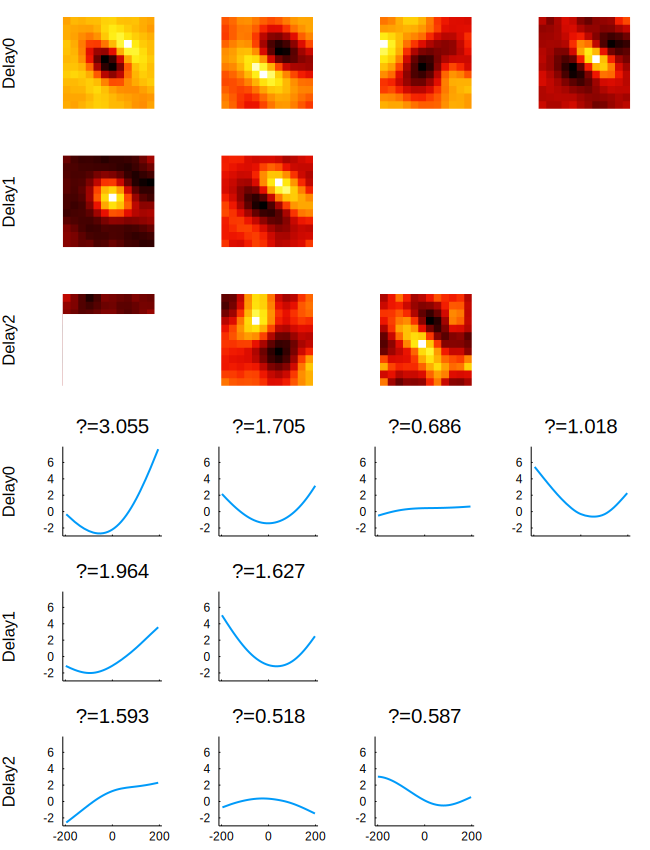

In [11]:
plotmodel(model,hp)

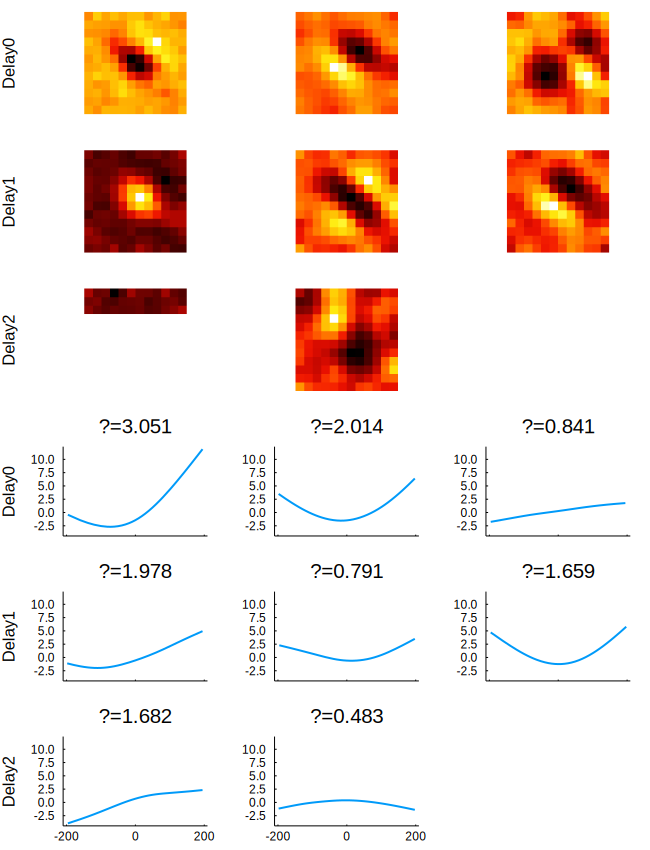

In [9]:
plotmodel(model,hp)

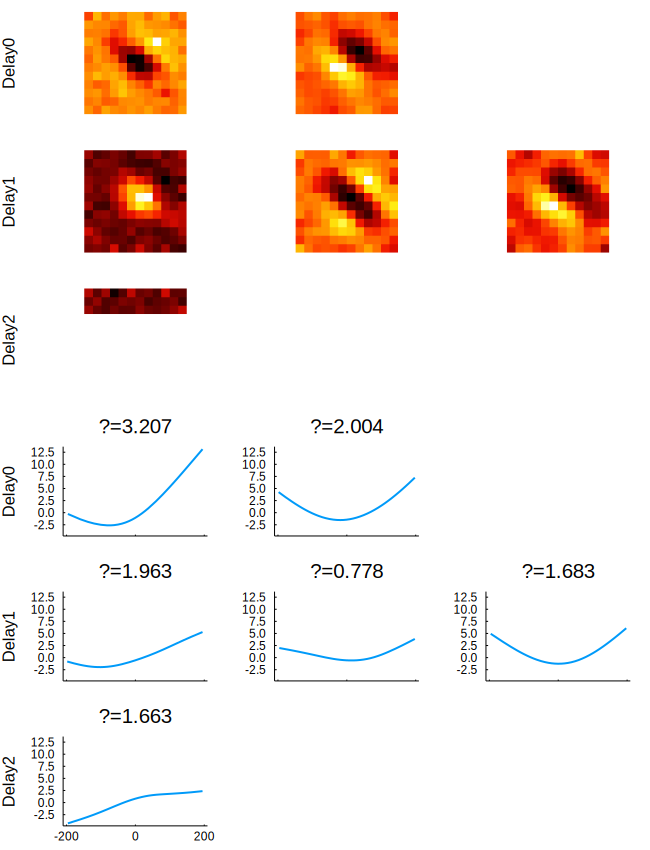

In [7]:
plotmodel(model,hp)

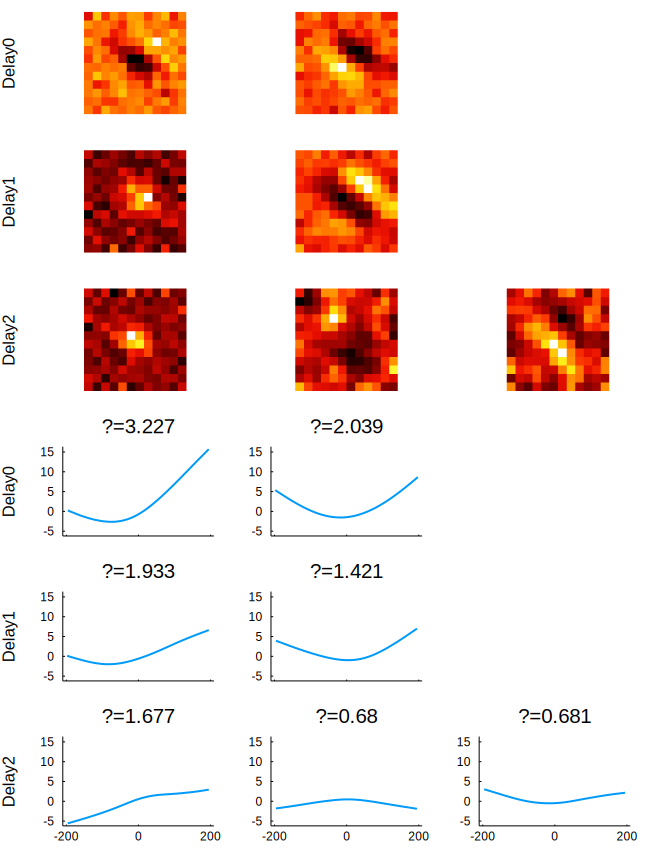

In [4]:
plotmodel(model,hp)

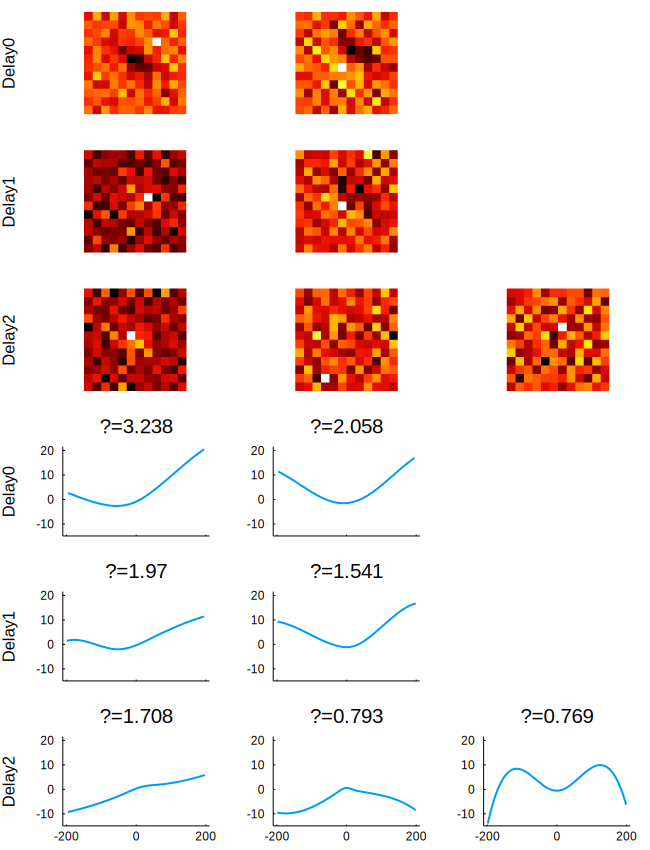

In [13]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

In [ ]:
hp=ePPRHyperParams(imagesize...,ndelay=3)
hp.lambda = 15
hp.nft = [6]
model,models = epprcv(x,y2,hp,debug);

### Final Model

In [ ]:
plotmodel(model,hp)

## Benchmark

In [ ]:
using BenchmarkTools
@btime model,models = epprcv(x,y,hp);